
## Assignment 2
Demostrate consequences of No Free Lunch Theorem: every model of machine learning makes assumptions about dataset properties. If the assumption fails, model perfoms badly. If the assumption is met, model perfoms good.

For each of the tasks, described below:

create a dataset to meet the description. For demonstration purposes, feature dimension size = 2
train the models and evaluate accuracy. (with a training pipeline, described in the seminar)
Show which model is better.
Write what assumptions were used, and why model exibits such behavior.
Plot dataset to demonstrate its properties. (Scatter plot, classes with different colors)
Tasks:

Create dataset for binary classification task (binary crossentropy), where k-NN perfoms worse than logistic regression

Create dataset for binary classification task (binary crossentropy), where logistic regression perfoms worse than k-NN

Create dataset for binary classification task (binary crossentropy), where k-NN with cosine distance perfoms better than k-NN with euclidean distance

! If there is no explanation, why one model perfoms better than the other on your dataset, the task does not count.
! if the training pipeline is not used, the task does not count.

## Task 1. Create dataset for binary classification task (binary crossentropy), where k-NN perfoms worse than logistic regression
Значением функции логистической регрессии является вероятность того, что данное исходное значение принадлежит к определенному классу.
В случае использования метода KNN для классификации объект присваивается тому классу, который является наиболее распространённым среди соседей данного элемента, классы которых уже известны.
Для решения задачи нам нужно сгенерировать выборку, которая будет линейно разделима, но в то же время в которой часто будут близки друг к другу объекты разных классов. Это может быть выборка, в которой точки в пространстве признаков, соответствующие объектам, лежат разреженно на довольно близких друг к другу двух параллельных прямых, причём на каждой прямой лежат только точки одного класса.

In [0]:
import numpy as np
import random
import matplotlib.pyplot as plt
from numpy import vectorize
import random
from sklearn.metrics import accuracy_score

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [0]:
def training_pipeline(clf, X, y, param_dict):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    clf.fit(X_train, y_train)
    validator = GridSearchCV(clf,
                             param_grid = param_dict,
                             cv = 5)
    validator.fit(X_train, y_train)
    clf = validator.best_estimator_

In [0]:
X1 = [(x, 2*x + 5) for x in range(0, 100, 5)]
X0 = [(x, z+2.5) for x, z in X1]
X = np.array(X1+X0)
y = np.array([1 for i in range(20)] + [0 for i in range(20)])

Text(0.5, 1.0, 'dataset for binary classification, where k-NN < logistic regression')

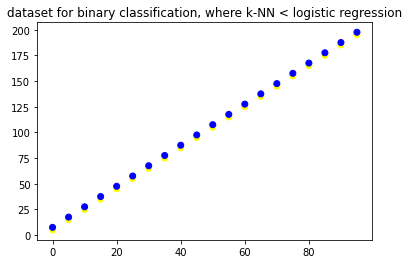

In [5]:
plt.figure()
color = ["yellow" if i==1 else "blue" for i in y]
plt.scatter([i[0] for i in X],
            [i[1] for i in X]
            , color=color)
plt.title('dataset for binary classification, where k-NN < logistic regression')

In [0]:
training_pipeline(LogisticRegression(solver='liblinear'), X, y,
                 {'C': np.arange(.01,1,.01)})

In [0]:
training_pipeline(KNeighborsClassifier(), X, y,
                 {'n_neighbors': range(1, 10)})

## Task 2. Create dataset for binary classification task (binary crossentropy), where logistic regression perfoms worse than k-NN
Для решения задачи нужно сделать выборку, которую невозможно разделить прямой на плоскости. А для улучшения задачи для KNN сделаем выборку, обьекты одного класса которой будут находиться рядом друг с другом, в некоторых центрах классов.

In [8]:
N = 300
X1 = np.random.randint(low=0,high=N//3, size=N//3)
X2 = np.random.randint(low=N//3, high=N//3*2, size=N//3)
X3 = np.random.randint(low=N//3*2, high=N, size=N//3)
X = np.append(X1,X2)
X = np.append(X, X3)
X = X / np.linalg.norm(X)

y = np.arange(0,N)
y = y / np.linalg.norm(y)

X_task2 = np.array([(X[i], y[i]) for i in range(0,N)])
X_task2.shape

(300, 2)

In [0]:
def model_pipline(model, X, y, hyper_params):
  scores = []
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
  model.fit(X_train, y_train)
  scores.append(model.score(X_train, y_train))

  grid_search = GridSearchCV(model, cv=5, param_grid=hyper_params)
  grid_search.fit(X_train, y_train)
  scores.append(grid_search.best_score_)
  
  model = grid_search.best_estimator_
  scores.append(model.score(X_test, y_test))

  return scores

In [10]:
y_task2 = np.array([[1 for i in range(0,N//3+3)] 
                    + [0 for i in range(N//3+3,N//3*2+3)] 
                    + [1 for i in range(N//3*2+3,N)]])
y_task2 = y_task2.reshape(N,)
y_task2.shape

(300,)

Text(0.5, 1.0, 'dataset for binary classification, where k-NN > logistic regression')

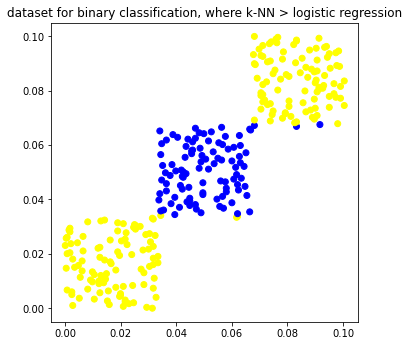

In [11]:
plt.figure(figsize=(5.5, 5.5))
plt.scatter([el[0] for el in X_task2],[el[1] for el in X_task2],
            c=['yellow' if el == 1 else 'blue' for el in y_task2])
plt.title('dataset for binary classification, where k-NN > logistic regression')

In [12]:
hyper_params = {
    'dual' : [True, False],
    'warm_start': [True, False],
    'solver' : ['liblinear']
}
scores = model_pipline(LogisticRegression(), X_task2, y_task2, hyper_params=hyper_params)
print('Train Acc {}; valid acc {}; test acc {}'.format(scores[0], scores[1], scores[2]))

Train Acc 0.6577777777777778; valid acc 0.6577777777777778; test acc 0.6933333333333334


In [13]:
hyper_params = {
    'n_neighbors': [i for i in range(1,10)],
    'weights' : ['uniform', 'distance'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
}
scores = model_pipline(KNeighborsClassifier(), X_task2, y_task2, hyper_params=hyper_params)
print('Train Acc {}; valid acc {}; test acc {}'.format(scores[0], scores[1], scores[2]))

Train Acc 0.9733333333333334; valid acc 0.9822222222222223; test acc 0.9866666666666667


## Task 3. Create dataset for binary classification task (binary crossentropy), where k-NN with cosine distance perfoms better than k-NN with euclidean distance
Косинусное расстояние велико, когда векторы, соответствующие точкам, находятся далеко друг от друга.
Евклидово расстояние велико, когда точки находятся далеко друг от друга.
Для решения задачи нужно не выполнять второе предложение, а выполнить первое, так что k-NN с косинусным расстоянием будет работать лучше чем k-NN с евклидовым расстоянием. Нужно сделать так, чтобы все точки данных одного класса были на одном векторе, так чтобы евклидово расстояние было равно нулю, а другой класс был разбросан вокруг.

In [0]:
n_samples = 100
class_size = int(n_samples/2)
class_sep = 5
step = 10

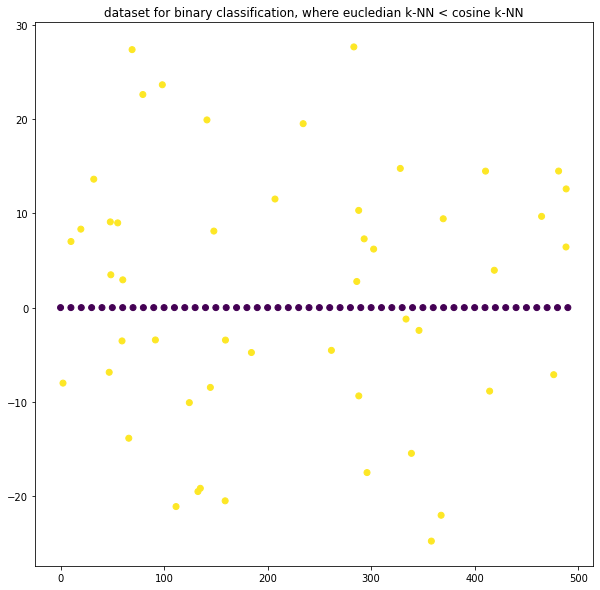

In [15]:

np.random.seed(0)
X_axis = np.array(list(range(0, class_size*step, step)))
Y_axis = np.array([0]*class_size)

Y_axis =  np.append(Y_axis, step * np.random.normal(size=int(class_size/2)) + class_sep)
Y_axis =  np.append(Y_axis, step * np.random.normal(size=int(class_size/2)) - class_sep)
X_axis = np.append(X_axis, np.random.uniform(0, step*class_size, size=class_size))

y = np.array([0] * class_size + [1] * class_size)

X = np.append([X_axis], [Y_axis, y], axis=0).T

np.random.shuffle(X)

plt.figure(figsize=(10, 10))
plt.title("dataset for binary classification, where eucledian k-NN < cosine k-NN")
plt.scatter(X[:, 0], X[:, 1], marker='o', c=X[:, 2])

In [0]:
train_ids, test_ids = train_test_split(range(n_samples), test_size=0.3, random_state=42)
y = X[:, 2]
X_train = X[train_ids]
X_test = X[test_ids]
y_train = y[train_ids]
y_test = y[test_ids]

k_range = list(range(1, class_size, int(class_size/10)))

In [17]:
neigh = KNeighborsClassifier(n_neighbors=10,  metric="euclidean")
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(neigh, param_grid, cv=10, scoring='accuracy', iid=True)
grid.fit(X_train, y_train)
best_k = grid.best_params_['n_neighbors']
neigh = KNeighborsClassifier(n_neighbors=best_k, metric="euclidean")
neigh.fit(X_train, y_train) 
knn_euc_test_score = accuracy_score(y_test, neigh.predict(X_test))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


In [18]:
neigh = KNeighborsClassifier(n_neighbors=10,  metric="cosine")
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(neigh, param_grid, cv=10, scoring='accuracy', iid=True)
grid.fit(X_train, y_train)
best_k = grid.best_params_['n_neighbors']
neigh = KNeighborsClassifier(n_neighbors=best_k, metric="cosine")
neigh.fit(X_train, y_train) 
knn_cos_test_score = accuracy_score(y_test, neigh.predict(X_test))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


In [19]:
print(f"cosine k-NN: {knn_cos_test_score}\neuclidian k-NN: {knn_euc_test_score}")

cosine k-NN: 1.0
euclidian k-NN: 0.43333333333333335
